In [1]:
import numpy as np
import matplotlib.pyplot as plt

## thermostat example

There are quite a few different scenarios which can happen

1. check for variable and non variable environment temperature
2. check for adustment != 1
3. check for cases where leak + adustment = 2
4. check for cases where leak + adustment > 2
5. check for cases where leak + adjustment > 2 and the inflow ceiling is removed

In [2]:
def env_temp(x,variable=True):
    if not variable:
        return 9
    else:
        if x <= 24 and x >= 0:
            return 5/36*(x-12)**2-10
        else:
            return env_temp(0, variable)

In [10]:
desired = 11
initial_room_temp =12
leak = 0.3
only_heat = False
adjustment = 1.0
variable_env = False

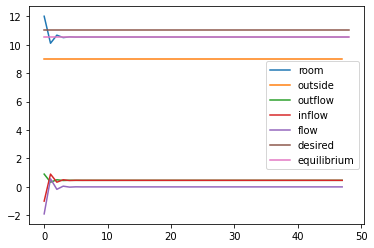

In [11]:
room_temp = [initial_room_temp]
out_temp = []
inflows = []
outflows = []
flows = []
for x in range(-12,36):
    env = env_temp(x,variable_env)
    out_temp.append(env)
    inflow = min(desired-room_temp[-1],5)*adjustment
    if only_heat:
        inflow = max(inflow, 0)
    outflow = (room_temp[-1] - env)*leak
    new_temp = room_temp[-1] + (inflow-outflow)
    room_temp.append(new_temp)
    inflows.append(inflow)
    outflows.append(outflow)
    flows.append(inflow-outflow)

eqm = (desired*adjustment+env*leak)/(adjustment+leak)
plt.plot(room_temp, label='room')
plt.plot(out_temp, label='outside')
plt.plot(outflows, label='outflow')
plt.plot(inflows, label='inflow')
plt.plot(flows, label='flow')
plt.plot([desired for _ in range(len(room_temp))], label='desired')
plt.plot([eqm for _ in range(len(room_temp))], label='equilibrium')
plt.legend()
plt.show()

## capital of a company

the depreciation at any given time should be capital(t - depreciation time), but the standard models assume that a fixed fraction of capital goes out of commission every year. That also works, since different capitals have different lifetimes.

1. check eff\*inv\*deprec == 1
2. check eff\*inv\*deprec < 1
3. check eff\*inv\*deprec > 1
4. check historical = True 

In [235]:
def capital(t,historical=False):
    # memoise in case the call is recursive
    if mem.get(t,None) is not None:
        return mem[t]
    stock = 0
    production = 0
    decommissioned = 0
    new_stock = 0
    if t < 0:
        stock = 0
    elif t == 0:
        stock = c0
    else:
        stock_prev = capital(t-dt, historical)[0]
        new_stock = stock_prev*eff*inv*dt
        if new_stock < 0:
            new_stock = 0
        if historical:
            decommissioned = capital(t-deprec, historical)[0]*dt
        else:
            decommissioned = stock_prev/deprec*dt
        stock = stock_prev + new_stock - decommissioned
    mem[t] = stock, new_stock, decommissioned
    return stock, new_stock, decommissioned

In [236]:
dt = 1
c0 = 100
eff = 0.35
inv = 0.6
deprec = 15
mem = {}
historical = True

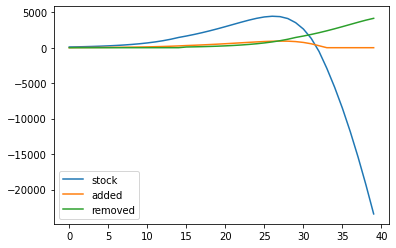

In [238]:
lot = []
production = []
decommission = []
for x in range(40):
    stock, prod, old = capital(x, historical)
    lot.append(stock)
    production.append(prod)
    decommission.append(old)
    
plt.plot(lot,label='stock')
plt.plot(production,label='added')
plt.plot(decommission,label='removed')
plt.legend()
plt.show()

# Sales inventory

Standard practices:
1. inventories are added at the end of the day and are not used for order calculations
2. the buffer discrepancy and response delay is calculated without including the current day's sales. The sales for a day are automatically added to the orders to be placed without any multiplicative factor

If these are not followed, in the equilibrium state at t=0, the number of orders would have been 0 or a fraction(by a factor response delay) of what would have been required to keep the lot size stable

### Delays (and values to change and experiment with):
1. Perception time: number of days to be averaged over for trend recognition
2. Response delay: Percentage of shortfall to cover
3. Delivery delay: Time delay between order and delivery

In [186]:
import math

In [222]:
def sales(t, variable=True):
    if not variable:
        return 20
#     return 20+math.sin(t*1/5*math.pi)
    if t <= 10:
        return 20
    else:
        return 22

In [229]:
initial_lot = 200
coverage = 10
perception_delay = 15
response_delay = 0.25
delivery_delay = 5

In [230]:
orders = [initial_lot/coverage for x in range(delivery_delay)]
daily_sales = []
lot = [initial_lot]
perceived_sales = []
for t in range(200):
    sale = sales(t)
    daily_sales.append(sale)
    perceived_sale = sum([sales(t-x) for x in range(perception_delay)])/perception_delay
    perceived_sales.append(perceived_sale)
    
    required_lot = perceived_sale * coverage
    order = (required_lot - lot[-1])*response_delay + sale
    if order < 0:
        order = 0
    orders.append(order)
    new_lot = lot[-1] + orders[t] - sale
    lot.append(new_lot)
#     print(lot[-1], sale, perceived_sale, required_lot, order)

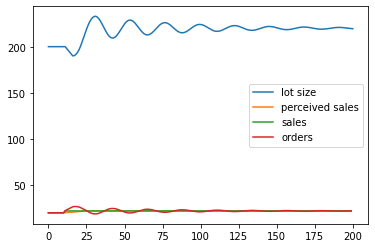

In [231]:
plt.plot(lot, label='lot size')
plt.plot(perceived_sales, label='perceived sales')
plt.plot(daily_sales, label='sales')
plt.plot(orders[5:], label='orders')
plt.legend()
plt.show()